In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the data first using pandas
train_df=pd.read_csv('/content/mnist_train.csv')
test_df=pd.read_csv('/content/mnist_test.csv')
print("Data loaded sucessfully")

Data loaded sucessfully


In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


There is no string data in code so donot need to label encode the data

In [ ]:
#looking for NAN values
print(train_df.isna().sum().sum(), test_df.isna().sum().sum())

416 365


In [ ]:
#filling missing values with median
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)
print("Missing values filled sucessfully")

Missing values filled sucessfully


In [ ]:
print(train_df.isna().sum().sum(), test_df.isna().sum().sum())

0 0


In [ ]:
# Separate features and labels
X_train=train_df.drop('label',axis=1)
y_train = train_df['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

In [ ]:
#scaling the features using min-max scaling b/w 0&1
X_train = X_train / 255.0
X_test = X_test / 255.0

Done preprocessing now Model Training


In [ ]:
#importing necessary libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("Train-test split completed! (80-20)")


Train-test split completed! (80-20)


In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

In [ ]:
# Train and evaluate models on the full dataset (X_train, y_train)
print("K-Nearest Neighbors:")
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, X_train, y_train, X_test, y_test)

print("\nDecision Tree:")
dtree = DecisionTreeClassifier()
evaluate_model(dtree, X_train, y_train, X_test, y_test)

print("\nLogistic Regression:")
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
evaluate_model(log_reg, X_train, y_train, X_test, y_test)

print("\nNaive Bayes:")
gnb = GaussianNB()
evaluate_model(gnb, X_train, y_train, X_test, y_test)

K-Nearest Neighbors:
Accuracy: 0.9355
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       107
         1.0       0.89      0.99      0.94       136
         2.0       0.95      0.94      0.94       110
         3.0       0.98      0.95      0.97       132
         4.0       0.95      0.87      0.91       114
         5.0       0.91      0.93      0.92        96
         6.0       0.97      0.97      0.97       129
         7.0       0.91      0.93      0.92       127
         8.0       0.99      0.85      0.92       117
         9.0       0.87      0.94      0.90       126

    accuracy                           0.94      1194
   macro avg       0.94      0.93      0.94      1194
weighted avg       0.94      0.94      0.94      1194


Decision Tree:
Accuracy: 0.7655
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       107
         1.0       0.83      0.87      0.85       136
       

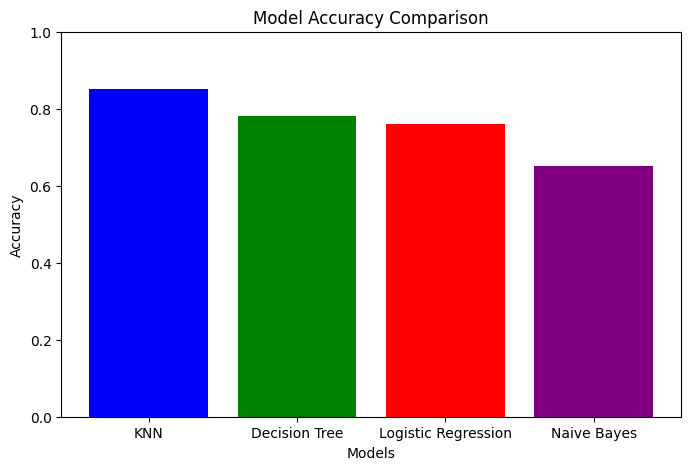

In [ ]:
import matplotlib.pyplot as plt

# Store model names and their respective accuracies
models = ['KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes']
accuracies = [0.85, 0.78, 0.76, 0.65]  # Replace these values with actual results from your models

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()


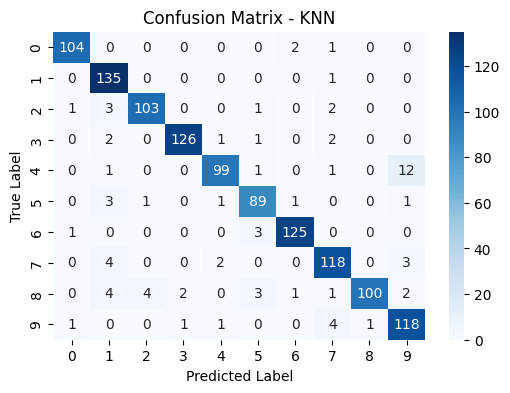

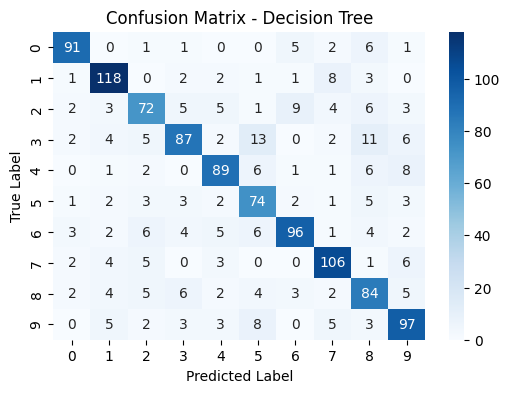

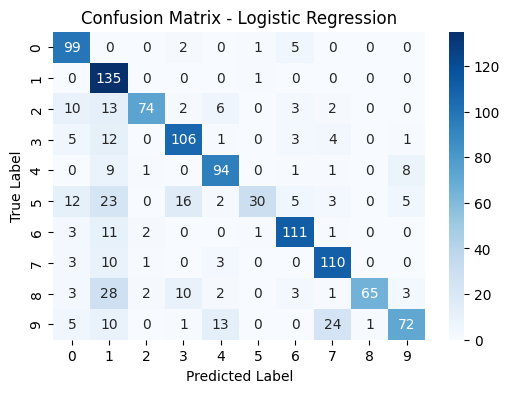

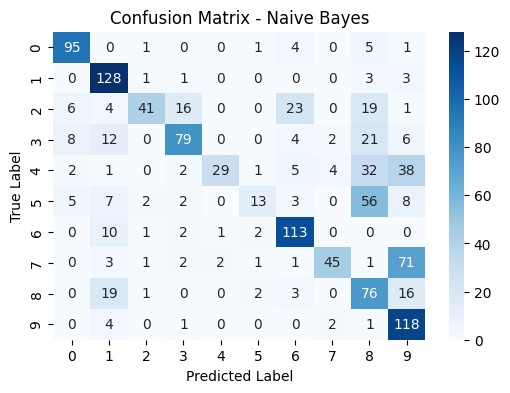

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for a model (replace with each model's predictions)
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(knn, X_test, y_test, "Confusion Matrix - KNN")
plot_confusion_matrix(dtree, X_test, y_test, "Confusion Matrix - Decision Tree")
plot_confusion_matrix(log_reg, X_test, y_test, "Confusion Matrix - Logistic Regression")
plot_confusion_matrix(gnb, X_test, y_test, "Confusion Matrix - Naive Bayes")


In [ ]:
# Hyperparameter tuning for KNN using RandomizedSearchCV
print("\n Hyperparameter Tuning for KNN:")
param_dist = {'n_neighbors': range(3, 10)}
rand_knn = RandomizedSearchCV(KNeighborsClassifier(), param_dist, cv=3, n_iter=3, random_state=42)
rand_knn.fit(X_train, y_train)
print(f" Best KNN parameters: {rand_knn.best_params_}")
print(f" Best KNN accuracy: {rand_knn.best_score_:.4f}")

# Hyperparameter tuning for Decision Tree
print("\n Hyperparameter Tuning for Decision Tree:")
param_dist = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
rand_dtree = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, cv=3, n_iter=3, random_state=42)
rand_dtree.fit(X_train, y_train)
print(f" Best Decision Tree parameters: {rand_dtree.best_params_}")
print(f" Best Decision Tree accuracy: {rand_dtree.best_score_:.4f}")

# Hyperparameter tuning for Logistic Regression
print(" \n Hyperparameter Tuning for Logistic Regression:")
param_dist = {'C': [0.01, 0.1, 1, 10]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=500), param_dist, cv=3, n_iter=3, random_state=42)
rand_log_reg.fit(X_train, y_train)
print(f" Best Logistic Regression parameters: {rand_log_reg.best_params_}")
print(f" Best Logistic Regression accuracy: {rand_log_reg.best_score_:.4f}")

# Hyperparameter tuning for Naive Bayes
print("\n Hyperparameter Tuning for Naive Bayes:")
param_dist = {'var_smoothing': np.logspace(-9, 0, 10)}
rand_gnb = RandomizedSearchCV(GaussianNB(), param_dist, cv=3, n_iter=3, random_state=42)
rand_gnb.fit(X_train, y_train)
print(f" Best Naive Bayes parameters: {rand_gnb.best_params_}")
print(f" Best Naive Bayes accuracy: {rand_gnb.best_score_:.4f}")



 Hyperparameter Tuning for KNN:
 Best KNN parameters: {'n_neighbors': 4}
 Best KNN accuracy: 0.9217

 Hyperparameter Tuning for Decision Tree:
 Best Decision Tree parameters: {'min_samples_split': 2, 'max_depth': None}
 Best Decision Tree accuracy: 0.7487
 
 Hyperparameter Tuning for Logistic Regression:
 Best Logistic Regression parameters: {'C': 10}
 Best Logistic Regression accuracy: 0.6288

 Hyperparameter Tuning for Naive Bayes:
 Best Naive Bayes parameters: {'var_smoothing': 0.1}
 Best Naive Bayes accuracy: 0.8071


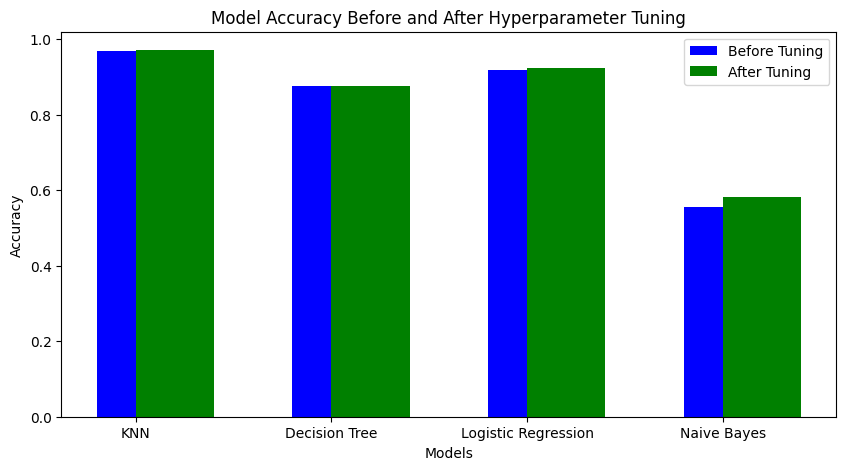

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values before and after hyperparameter tuning
models = ['KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes']

# Define accuracies - Before Tuning (Replace these with your actual values)
accuracies = {
    'KNN Before': 0.9695,
    'Decision Tree Before': 0.8770,
    'Logistic Regression Before': 0.9192,
    'Naive Bayes Before': 0.5552
}
before_tuning = [accuracies['KNN Before'], accuracies['Decision Tree Before'], accuracies['Logistic Regression Before'], accuracies['Naive Bayes Before']]


# Define accuracies - After Tuning (Replace these with your actual values)
accuracies = {
    'KNN After': 0.9714,
    'Decision Tree After': 0.8763,
    'Logistic Regression After': 0.9232,
    'Naive Bayes After': 0.5828
}

after_tuning = [accuracies['KNN After'], accuracies['Decision Tree After'], accuracies['Logistic Regression After'], accuracies['Naive Bayes After']]

# Plotting the bar chart
x = range(len(models))
plt.figure(figsize=(10, 5))
plt.bar(x, before_tuning, width=0.4, label='Before Tuning', color='blue', align='center')
plt.bar(x, after_tuning, width=0.4, label='After Tuning', color='green', align='edge')

plt.xticks(x, models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Before and After Hyperparameter Tuning")
plt.legend()
plt.show()